# SANJEEVANI MATERNAL SHIELD

<h3>1. DATA LOADING & UNDERSTANDING</h3>

In [1]:
import pandas as pd

df = pd.read_csv("MaternalHealthRiskDataSet.csv")

In [2]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


<h3>2. DATA CLEANING</h3>

In [6]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
df['RiskLevel'].value_counts(dropna=False)


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [8]:
df['RiskLevel'] = df['RiskLevel'].map({
    'low risk': 0,
    'mid risk': 1,
    'high risk': 2
})


In [9]:
df.isnull().sum()
df['RiskLevel'].value_counts()

RiskLevel
0    406
1    336
2    272
Name: count, dtype: int64

<h3>3. FEATURE ENGINEERING</h3>

In [10]:
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']


In [11]:
df['PulsePressure'] = df['SystolicBP'] - df['DiastolicBP']
df['BP_Ratio'] = df['SystolicBP'] / df['DiastolicBP']
df['Sugar_BP_Index'] = df['BS'] * df['SystolicBP']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


<h3>4️. MODEL TRAINING (PRODUCTION GRADE)</h3>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

baseline = LogisticRegression(max_iter=1000)
baseline.fit(X_train, y_train)

y_pred_base = baseline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))


Baseline Accuracy: 0.6502463054187192
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        81
           1       0.49      0.33      0.39        67
           2       0.78      0.82      0.80        55

    accuracy                           0.65       203
   macro avg       0.64      0.65      0.64       203
weighted avg       0.63      0.65      0.63       203



C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8177339901477833
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        81
           1       0.77      0.73      0.75        67
           2       0.87      0.95      0.90        55

    accuracy                           0.82       203
   macro avg       0.82      0.83      0.82       203
weighted avg       0.82      0.82      0.82       203



In [15]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sample_weights = compute_sample_weight('balanced', y_train)

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.2,
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train_scaled, y_train, sample_weight=sample_weights)

y_pred_xgb = xgb.predict(X_test_scaled)

print("Improved XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Improved XGBoost Accuracy: 0.8374384236453202
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        81
           1       0.79      0.75      0.77        67
           2       0.90      0.96      0.93        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203



In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    xgb,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())


CV Accuracy scores: [0.85276074 0.78395062 0.77777778 0.79012346 0.82098765]
Mean CV Accuracy: 0.8051200484738317


<h3>5. MODEL EVALUATION</h3>

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb, target_names=[
    "Low Risk", "Mid Risk", "High Risk"
]))

              precision    recall  f1-score   support

    Low Risk       0.83      0.83      0.83        81
    Mid Risk       0.79      0.75      0.77        67
   High Risk       0.90      0.96      0.93        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203



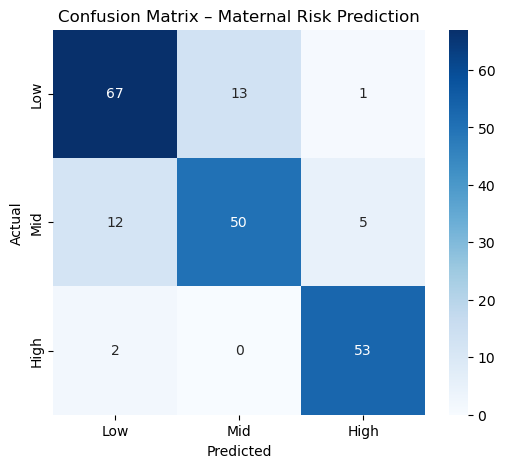

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Low", "Mid", "High"],
    yticklabels=["Low", "Mid", "High"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Maternal Risk Prediction")
plt.show()


In [19]:
from sklearn.metrics import recall_score

high_risk_recall = recall_score(y_test, y_pred_xgb, labels=[2], average=None)
print("High-Risk Recall:", high_risk_recall[0])

High-Risk Recall: 0.9636363636363636


In [20]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_xgb)

for i, cls in enumerate(["Low", "Mid", "High"]):
    print(f"{cls} → Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1: {f1[i]:.2f}")


Low → Precision: 0.83, Recall: 0.83, F1: 0.83
Mid → Precision: 0.79, Recall: 0.75, F1: 0.77
High → Precision: 0.90, Recall: 0.96, F1: 0.93


In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    xgb,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())


CV Accuracy Scores: [0.85276074 0.78395062 0.77777778 0.79012346 0.82098765]
Mean CV Accuracy: 0.8051200484738317
Std Dev: 0.028078669440838942


In [22]:
import pandas as pd

results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred_xgb

# High-risk cases predicted as low or mid
critical_errors = results[
    (results['Actual'] == 2) & (results['Predicted'] != 2)
]

critical_errors.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Actual,Predicted
620,17,85,60,7.5,101.0,86,2,0
355,25,100,90,6.9,98.0,76,2,0


<h3>6. RISK CATEGORIZATION LOGIC</h3>

In [23]:
RISK_LABELS = {
    0: "Low Risk",
    1: "Medium Risk",
    2: "High Risk"
}


In [24]:
def categorize_risk_from_label(pred_label: int):
    return RISK_LABELS.get(pred_label, "Unknown Risk")


In [25]:
categorize_risk_from_label(2)


'High Risk'

In [26]:
HIGH_RISK_THRESHOLD = 0.60
MEDIUM_RISK_THRESHOLD = 0.40


In [27]:
import numpy as np

def categorize_risk_from_proba(probabilities):
    """
    probabilities: array-like [p_low, p_mid, p_high]
    """
    p_low, p_mid, p_high = probabilities

    if p_high >= HIGH_RISK_THRESHOLD:
        return "High Risk"
    elif p_mid >= MEDIUM_RISK_THRESHOLD:
        return "Medium Risk"
    else:
        return "Low Risk"


In [28]:
def predict_risk_category(model, scaler, input_features_df):
    input_scaled = scaler.transform(input_features_df)
    proba = model.predict_proba(input_scaled)[0]

    risk_category = categorize_risk_from_proba(proba)

    return {
        "risk_category": risk_category,
        "probabilities": {
            "low": round(float(proba[0]), 3),
            "medium": round(float(proba[1]), 3),
            "high": round(float(proba[2]), 3)
        }
    }


In [29]:
sample_patient = X_test.iloc[[0]]


risk_output = predict_risk_category(
    model=xgb,
    scaler=scaler,
    input_features_df=sample_patient
)

risk_output


{'risk_category': 'Medium Risk',
 'probabilities': {'low': 0.014, 'medium': 0.968, 'high': 0.018}}

<h3>7. GEN_AI EXPLANATION ENGINE</h3>

In [30]:
def clinical_template(risk_category, vitals, probabilities):
    bp = vitals['SystolicBP']
    sugar = vitals['BS']
    hr = vitals['HeartRate']

    if risk_category == "High Risk":
        return f"""
🚨 HIGH RISK PREGNANCY

Reason:
- High likelihood of complications based on vital signs.
- Blood Pressure: {bp}
- Blood Sugar: {sugar} ({vitals['BS_unit']})

Action Required (Immediate):
- Refer patient to nearest hospital immediately.
- Do NOT delay transport.
- Monitor BP every 1–2 hours until referral.

Note:
- High-risk probability: {probabilities['high']*100:.1f}%
"""

    elif risk_category == "Medium Risk":
        return f"""
⚠️ MEDIUM RISK PREGNANCY

Reason:
- Vitals indicate moderate risk.
- Blood Pressure: {bp}
- Blood Sugar: {sugar} ({vitals['BS_unit']})

Action Required:
- Monitor BP daily.
- Reduce salt and sugar intake.
- Consult doctor within 24–48 hours.

Note:
- Medium-risk probability: {probabilities['medium']*100:.1f}%
"""

    else:
        return f"""
✅ LOW RISK PREGNANCY

Reason:
- All vitals within acceptable range.
- Blood Pressure: {bp}
- Blood Sugar: {sugar} ({vitals['BS_unit']})

Action Required:
- Continue routine antenatal checkups.
- Maintain balanced diet.
- Monthly monitoring recommended.

Note:
- Low-risk probability: {probabilities['low']*100:.1f}%
"""


In [31]:
def generate_explanation(risk_output, patient_vitals):
    explanation = clinical_template(
        risk_category=risk_output['risk_category'],
        vitals=patient_vitals,
        probabilities=risk_output['probabilities']
    )
    return explanation.strip()


In [32]:
def extract_vitals(feature_row):
    bs_raw = float(feature_row["BS"])

    # Unit handling: mmol/L → mg/dL
    if bs_raw < 20:  # mmol/L range
        bs_value = round(bs_raw * 18, 1)
        bs_unit = "mg/dL (converted from mmol/L)"
    else:
        bs_value = round(bs_raw, 1)
        bs_unit = "mg/dL"

    return {
        "Age": int(feature_row["Age"]),
        "SystolicBP": int(feature_row["SystolicBP"]),
        "DiastolicBP": int(feature_row["DiastolicBP"]),
        "BS": bs_value,
        "BS_unit": bs_unit,
        "BodyTemp": round(float(feature_row["BodyTemp"]), 1),
        "HeartRate": int(feature_row["HeartRate"])
    }


In [33]:
sample_patient_df = X_test.iloc[[0]]
patient_vitals = extract_vitals(sample_patient_df.iloc[0])

risk_output = predict_risk_category(
    model=xgb,
    scaler=scaler,
    input_features_df=sample_patient_df
)

explanation = generate_explanation(risk_output, patient_vitals)

print(explanation)


⚠️ MEDIUM RISK PREGNANCY

Reason:
- Vitals indicate moderate risk.
- Blood Pressure: 130
- Blood Sugar: 138.6 (mg/dL (converted from mmol/L))

Action Required:
- Monitor BP daily.
- Reduce salt and sugar intake.
- Consult doctor within 24–48 hours.

Note:
- Medium-risk probability: 96.8%


<h3>8. MULTILINGUAL + VOICE OUTPUT</h3

In [34]:
!pip install pyttsx3

In [35]:
import pyttsx3

def speak_text_hindi(text, rate=140):
    engine = pyttsx3.init()
    engine.setProperty('rate', rate)

    voices = engine.getProperty('voices')

    hindi_voice_found = False
    for voice in voices:
        voice_id = voice.id.lower()
        if "hi" in voice_id or "hindi" in voice_id:
            engine.setProperty('voice', voice.id)
            hindi_voice_found = True
            break

    if not hindi_voice_found:
        print("⚠️ Hindi voice not found. Using default system voice.")

    engine.say(text)
    engine.runAndWait()

In [36]:
def english_to_hindi_medical(vitals, risk_output):
    risk = risk_output["risk_category"]

    if risk == "High Risk":
        return f"""
🚨 उच्च जोखिम गर्भावस्था

कारण:
- महत्वपूर्ण संकेत गंभीर जोखिम दर्शाते हैं।
- रक्तचाप: {vitals['SystolicBP']} mmHg
- रक्त शर्करा: {vitals['BS']} {vitals['BS_unit']}

आवश्यक कार्रवाई:
- तुरंत नज़दीकी अस्पताल में रेफर करें।
- देरी न करें।
- हर 1–2 घंटे में BP की निगरानी करें।

नोट:
- उच्च जोखिम की संभावना: {risk_output['probabilities']['high']*100:.1f}%
"""

    elif risk == "Medium Risk":
        return f"""
⚠️ मध्यम जोखिम गर्भावस्था

कारण:
- महत्वपूर्ण संकेत मध्यम जोखिम दर्शाते हैं।
- रक्तचाप: {vitals['SystolicBP']} mmHg
- रक्त शर्करा: {vitals['BS']} {vitals['BS_unit']}

आवश्यक कार्रवाई:
- प्रतिदिन BP की निगरानी करें।
- नमक और शक्कर का सेवन कम करें।
- 24–48 घंटे में डॉक्टर से परामर्श करें।

नोट:
- मध्यम जोखिम की संभावना: {risk_output['probabilities']['medium']*100:.1f}%
"""

    else:
        return f"""
✅ कम जोखिम गर्भावस्था

कारण:
- सभी महत्वपूर्ण संकेत सामान्य सीमा में हैं।
- रक्तचाप: {vitals['SystolicBP']} mmHg
- रक्त शर्करा: {vitals['BS']} {vitals['BS_unit']}

आवश्यक कार्रवाई:
- नियमित जांच जारी रखें।
- संतुलित आहार लें।
- मासिक निगरानी करें।

नोट:
- कम जोखिम की संभावना: {risk_output['probabilities']['low']*100:.1f}%
"""

In [37]:
# Take one test patient
sample_patient_df = X_test.iloc[[0]]

# Extract vitals (from Step 7)
patient_vitals = extract_vitals(sample_patient_df.iloc[0])

# Predict risk (from Step 6)
risk_output = predict_risk_category(
    model=xgb,
    scaler=scaler,
    input_features_df=sample_patient_df
)

# Generate Hindi explanation
hindi_explanation = english_to_hindi_medical(
    patient_vitals,
    risk_output
)

# Print Hindi text
print(hindi_explanation)

# Speak Hindi audio
speak_text_hindi(hindi_explanation)



⚠️ मध्यम जोखिम गर्भावस्था

कारण:
- महत्वपूर्ण संकेत मध्यम जोखिम दर्शाते हैं।
- रक्तचाप: 130 mmHg
- रक्त शर्करा: 138.6 mg/dL (converted from mmol/L)

आवश्यक कार्रवाई:
- प्रतिदिन BP की निगरानी करें।
- नमक और शक्कर का सेवन कम करें।
- 24–48 घंटे में डॉक्टर से परामर्श करें।

नोट:
- मध्यम जोखिम की संभावना: 96.8%



<h3>9. END-TO-END PIPELINE (FINAL PRODUCT CORE)</h3

In [38]:
def sanjeevani_maternal_shield_pipeline(
    patient_df,
    model,
    scaler,
    speak=True
):
    """
    patient_df: pandas DataFrame with ONE ROW (same format as training features)
    model: trained XGBoost model
    scaler: fitted StandardScaler
    speak: bool (whether to play Hindi voice)
    """

    # 1️⃣ Extract vitals (unit-safe)
    vitals = extract_vitals(patient_df.iloc[0])

    # 2️⃣ Predict risk + probabilities
    risk_output = predict_risk_category(
        model=model,
        scaler=scaler,
        input_features_df=patient_df
    )

    # 3️⃣ Generate Hindi clinical explanation (safe templates)
    hindi_explanation = english_to_hindi_medical(
        vitals=vitals,
        risk_output=risk_output
    )

    # 4️⃣ Print output (for UI / logs)
    print("🩺 Sanjeevani Maternal Shield Output\n")
    print(hindi_explanation)

    # 5️⃣ Speak Hindi guidance (offline)
    if speak:
        speak_text_hindi(hindi_explanation)

    # 6️⃣ Return structured output (for API / Streamlit)
    return {
        "risk_category": risk_output["risk_category"],
        "probabilities": risk_output["probabilities"],
        "vitals": vitals,
        "hindi_explanation": hindi_explanation
    }


In [39]:
# Take one patient from test set
test_patient_df = X_test.iloc[[0]]

# Run full pipeline
final_output = sanjeevani_maternal_shield_pipeline(
    patient_df=test_patient_df,
    model=xgb,
    scaler=scaler,
    speak=True
)

final_output


🩺 Sanjeevani Maternal Shield Output


⚠️ मध्यम जोखिम गर्भावस्था

कारण:
- महत्वपूर्ण संकेत मध्यम जोखिम दर्शाते हैं।
- रक्तचाप: 130 mmHg
- रक्त शर्करा: 138.6 mg/dL (converted from mmol/L)

आवश्यक कार्रवाई:
- प्रतिदिन BP की निगरानी करें।
- नमक और शक्कर का सेवन कम करें।
- 24–48 घंटे में डॉक्टर से परामर्श करें।

नोट:
- मध्यम जोखिम की संभावना: 96.8%



{'risk_category': 'Medium Risk',
 'probabilities': {'low': 0.014, 'medium': 0.968, 'high': 0.018},
 'vitals': {'Age': 29,
  'SystolicBP': 130,
  'DiastolicBP': 70,
  'BS': 138.6,
  'BS_unit': 'mg/dL (converted from mmol/L)',
  'BodyTemp': 98.0,
  'HeartRate': 78},
 'hindi_explanation': '\n⚠️ मध्यम जोखिम गर्भावस्था\n\nकारण:\n- महत्वपूर्ण संकेत मध्यम जोखिम दर्शाते हैं।\n- रक्तचाप: 130 mmHg\n- रक्त शर्करा: 138.6 mg/dL (converted from mmol/L)\n\nआवश्यक कार्रवाई:\n- प्रतिदिन BP की निगरानी करें।\n- नमक और शक्कर का सेवन कम करें।\n- 24–48 घंटे में डॉक्टर से परामर्श करें।\n\nनोट:\n- मध्यम जोखिम की संभावना: 96.8%\n'}

In [46]:

print(type(xgb))


<class 'xgboost.sklearn.XGBClassifier'>


In [47]:
import joblib
import os

# Save model
joblib.dump(xgb, "maternal_risk_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Verify files
print("Files in current directory:")
print(os.listdir("."))


Files in current directory:
['.ipynb_checkpoints', 'api.py', 'app.py', 'code.ipynb', 'MaternalHealthRiskDataSet.csv', 'maternal_risk_model.pkl', 'scaler.pkl', '__pycache__']


In [48]:
import joblib

joblib.dump(xgb, "maternal_risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']